<a href="https://colab.research.google.com/github/sgpatel/MachineLearning/blob/master/SharePrice_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

Epoch 1/25
85/85 [==============================] - 5s 12ms/step - loss: 0.0093
Epoch 2/25
85/85 [==============================] - 1s 12ms/step - loss: 0.0021
Epoch 3/25
85/85 [==============================] - 1s 12ms/step - loss: 0.0019
Epoch 4/25
85/85 [==============================] - 1s 12ms/step - loss: 0.0019
Epoch 5/25
85/85 [==============================] - 1s 12ms/step - loss: 0.0018
Epoch 6/25
85/85 [==============================] - 1s 11ms/step - loss: 0.0018
Epoch 7/25
85/85 [==============================] - 1s 12ms/step - loss: 0.0015
Epoch 8/25
85/85 [==============================] - 1s 12ms/step - loss: 0.0017
Epoch 9/25
85/85 [==============================] - 1s 12ms/step - loss: 0.0014
Epoch 10/25
85/85 [==============================] - 1s 12ms/step - loss: 0.0015
Epoch 11/25
85/85 [==============================] - 1s 12ms/step - loss: 0.0014
Epoch 12/25
85/85 [==============================] - 1s 12ms/step - loss: 0.0013
Epoch 13/25
85/85 [==================

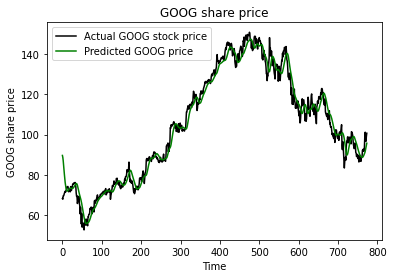

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt
import yfinance as yf

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

company = 'GOOG'

startDate = dt.datetime(2012,1,1)
endDate = dt.datetime(2023,1,1)
fb = yf.Ticker(company)
data=fb.history(start=startDate,end=endDate)

#print(data)


scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))
prediction_days =60

x_train =[]
y_train =[]

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])
               
               
            
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
               
model = Sequential()
               
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train,epochs=25, batch_size=32)
          
'''Test the model Accuracy on existing data '''
          
test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()
          
test_data =fb.history(start=test_start,end=test_end)        
               
actual_prices = test_data['Close'].values
          
total_dataset = pd.concat((data['Close'],test_data['Close']),axis=0)
          
model_inputs = total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)
          
          
# Make Prediction on test data
          
x_test =[]
          
for x in range(prediction_days,len(model_inputs)):
          x_test.append(model_inputs[x-prediction_days:x,0])
          
x_test= np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
                        
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

plt.plot(actual_prices, color="black",label=f"Actual {company} stock price")
plt.plot(predicted_prices,color='green', label=f'Predicted {company} price')
plt.title(f"{company} share price")
plt.xlabel("Time")
plt.ylabel(f"{company} share price")
plt.legend()
plt.show()